In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

marketing_data = pd.read_csv('marketing_data.csv')
marketing_data.head()

,Unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [10]:
data = marketing_data.drop(['Unnamed: 0'], axis=1)
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [11]:
numericals = data.select_dtypes(include = np.number)
categoricals = data.select_dtypes(include = object)
y = numericals['total claim amount']

In [12]:
from sklearn.preprocessing import OneHotEncoder

categoricals_array = encoder.transform(categoricals).toarray()

In [13]:
final_columns = list()
to_drop_columns = list()

for columns in encoder.categories_:
    to_drop_columns.append(columns[0])
    for column in columns.tolist():
        final_columns.append(column)

In [14]:
categoricals_dataframe = pd.DataFrame(data = categoricals_array, columns = final_columns)

In [15]:
X = pd.concat([numericals, categoricals_dataframe], axis = 1)

In [16]:
# Trying to improve the model

X

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,AA10041,...,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,four-door car,Large,Medsize,Small
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


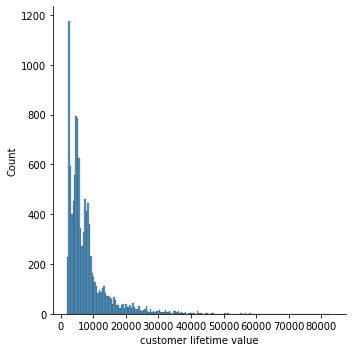

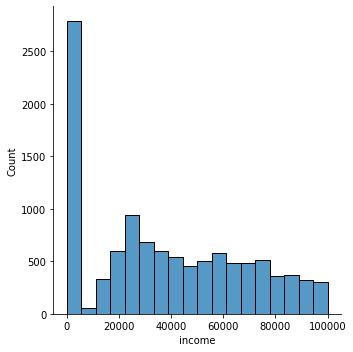

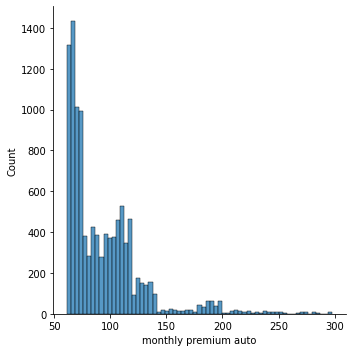

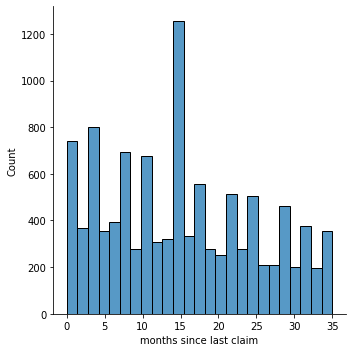

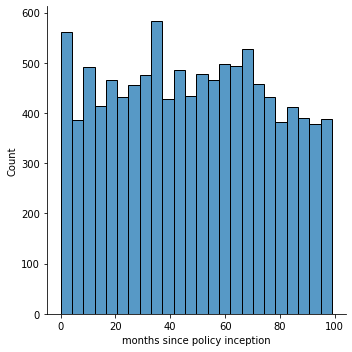

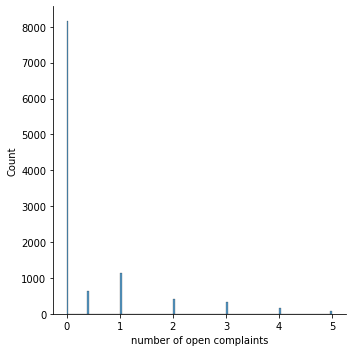

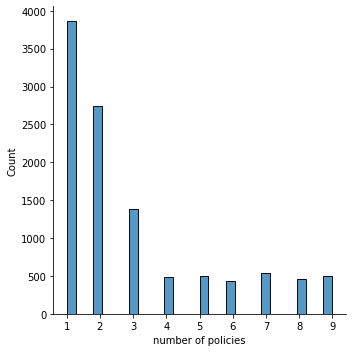

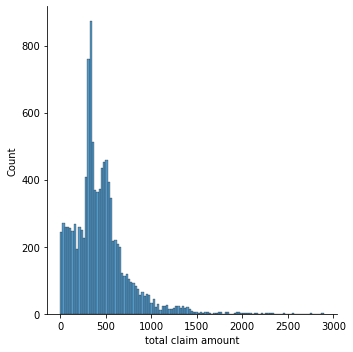

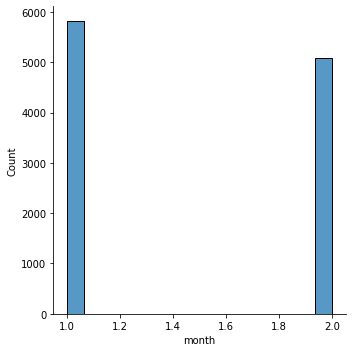

In [21]:
for i in range(9):
    sns.displot(X.iloc[:,i])
    plt.show()

In [23]:
#Removing outliers from columns

iqr = np.percentile(data['customer lifetime value'],75) - np.percentile(data['customer lifetime value'],25)
upper_limit = np.percentile(data['customer lifetime value'],75) + 1.5*iqr
lower_limit = np.percentile(data['customer lifetime value'],25) - 1.5*iqr
data = data[(data['customer lifetime value']>lower_limit) & (data['customer lifetime value']<upper_limit)]
plt.show()

In [25]:
iqr = np.percentile(data['monthly premium auto'],75) - np.percentile(data['monthly premium auto'],25)
upper_limit = np.percentile(data['monthly premium auto'],75) + 1.5*iqr
lower_limit = np.percentile(data['monthly premium auto'],25) - 1.5*iqr
data = data[(data['monthly premium auto']>lower_limit) & (data['monthly premium auto']<upper_limit)]
plt.show()

In [26]:
iqr = np.percentile(data['total claim amount'],75) - np.percentile(data['total claim amount'],25)
upper_limit = np.percentile(data['total claim amount'],75) + 1.5*iqr
lower_limit = np.percentile(data['total claim amount'],25) - 1.5*iqr
data = data[(data['total claim amount']>lower_limit) & (data['total claim amount']<upper_limit)]
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 42)

In [28]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

predictions = linear_regression.predict(X_test)

r2 = r2_score(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
mae = mean_absolute_error(predictions, y_test)

In [31]:
print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')


R2: 0.9999999999999727
MSE: 2.3067160911601463e-09
MAE: 2.1038353415747413e-05


In [ ]:
# The model didn't improve significantly
# there is a very high score and that could be suspicious that somethong got wrong